# 사전 세팅

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
import pandas as pd

data_dir = '/content/drive/MyDrive/3학년 2학기/싱가포르/data/'

# Dictionary to store DataFrames
data = {}

# List all files in the directory
if os.path.exists(data_dir):
    for filename in os.listdir(data_dir):
        if filename.endswith('.csv'):
            filepath = os.path.join(data_dir, filename)
            df_name = os.path.splitext(filename)[0] # Use filename without extension as key
            print(f"Loading {filename}...")
            try:
                data[df_name] = pd.read_csv(filepath)
                print(f"Successfully loaded '{df_name}'. First 5 rows:")
                display(data[df_name].head())
                print("\n" + "-"*30 + "\n") # Separator for better readability
            except Exception as e:
                print(f"Error loading {filename}: {e}")
else:
    print(f"Directory not found: {data_dir}")

# You can access your DataFrames like this:
# 예를 들어, 'my_data.csv'가 있다면 data['my_data']로 접근합니다.
# print(data.keys()) # To see all loaded DataFrame names

Loading Reward.csv...
Successfully loaded 'Reward'. First 5 rows:


,account_id,ts,reward_amount
0,A_f96ede8d34,2025-01-02 08:14:06.194179,6.843929
1,A_f96ede8d34,2025-01-02 08:14:06.241981,6.938105
2,A_2db64f326b,2025-01-02 08:15:13.284073,6.843929
3,A_2db64f326b,2025-01-02 08:15:13.381792,6.938105
4,A_f96ede8d34,2025-01-03 07:32:10.198387,7.036313



------------------------------

Loading Funding.csv...
Successfully loaded 'Funding'. First 5 rows:


,account_id,ts,fee_rate,funding_fee
0,A_06d5bd3da9,2025-03-01 00:00:00.348937,0.000050,0.000063
1,A_06d5bd3da9,2025-03-01 00:00:00.348937,0.000050,0.000063
2,A_40cfe40ac2,2025-03-01 00:00:00.806171,0.000100,-0.065085
3,A_7e27164ab6,2025-03-01 00:00:00.889929,0.000022,0.000403
4,A_ebdb869fd3,2025-03-01 00:00:00.889929,0.000022,0.000037



------------------------------

Loading Trade.csv...
Successfully loaded 'Trade'. First 5 rows:


,account_id,ts,symbol,side,openclose,position_id,leverage,price,qty,amount
0,A_c668740478,2025-03-01 00:04:14.329767,BTCUSDT.PERP,LONG,OPEN,P_9ecd54214c,50,84303.5,0.177839,14992.450136
1,A_c668740478,2025-03-01 00:09:08.199617,BTCUSDT.PERP,LONG,CLOSE,P_9ecd54214c,0,84321.0,0.177839,14995.562319
2,A_7e27164ab6,2025-03-01 00:23:25.371503,BTCUSDT.PERP,LONG,OPEN,P_fbe21fd2c4,2,84369.2,0.002787,235.136960
3,A_c668740478,2025-03-01 00:30:03.218306,BTCUSDT.PERP,LONG,OPEN,P_9567d3d1d3,50,84243.3,0.178533,15040.209079
4,A_c668740478,2025-03-01 00:34:38.392647,BTCUSDT.PERP,LONG,CLOSE,P_9567d3d1d3,0,84121.0,0.178533,15018.374493



------------------------------

Loading IP.csv...
Successfully loaded 'IP'. First 5 rows:


,account_id,ip
0,A_1f97e16953,100.222.49.58
1,A_946b028740,18.96.95.89
2,A_78e950c1a2,13.120.90.27
3,A_0e72128b0d,190.83.18.146
4,A_0ad0445c5a,11.179.9.226



------------------------------

Loading Spec.csv...
Successfully loaded 'Spec'. First 5 rows:


,symbol,day,funding_interval,max_order_amount
0,IMXUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
1,MOVEUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
2,SXPUSDT.PERP,2025-03-01 00:00:00.000000,8,75000.0
3,PONKEUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0
4,KDAUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0



------------------------------



In [6]:
for df_name, df in data.items():
    if df_name != 'Spec':
        if 'account_id' in df.columns:
            print(f"Setting 'account_id' as index for '{df_name}' DataFrame...")
            data[df_name] = df.set_index('account_id')
            print(f"Updated '{df_name}' DataFrame. First 5 rows with new index:")
            display(data[df_name].head())
            print("\n" + "-"*30 + "\n")
        else:
            print(f"Warning: 'account_id' column not found in '{df_name}' DataFrame. Skipping index setting.")
    else:
        print(f"Skipping 'Spec' DataFrame as requested. First 5 rows:")
        display(data[df_name].head())
        print("\n" + "-"*30 + "\n")

Setting 'account_id' as index for 'Reward' DataFrame...
Updated 'Reward' DataFrame. First 5 rows with new index:


,ts,reward_amount
account_id,,
A_f96ede8d34,2025-01-02 08:14:06.194179,6.843929
A_f96ede8d34,2025-01-02 08:14:06.241981,6.938105
A_2db64f326b,2025-01-02 08:15:13.284073,6.843929
A_2db64f326b,2025-01-02 08:15:13.381792,6.938105
A_f96ede8d34,2025-01-03 07:32:10.198387,7.036313



------------------------------

Setting 'account_id' as index for 'Funding' DataFrame...
Updated 'Funding' DataFrame. First 5 rows with new index:


,ts,fee_rate,funding_fee
account_id,,,
A_06d5bd3da9,2025-03-01 00:00:00.348937,0.000050,0.000063
A_06d5bd3da9,2025-03-01 00:00:00.348937,0.000050,0.000063
A_40cfe40ac2,2025-03-01 00:00:00.806171,0.000100,-0.065085
A_7e27164ab6,2025-03-01 00:00:00.889929,0.000022,0.000403
A_ebdb869fd3,2025-03-01 00:00:00.889929,0.000022,0.000037



------------------------------

Setting 'account_id' as index for 'Trade' DataFrame...
Updated 'Trade' DataFrame. First 5 rows with new index:


,ts,symbol,side,openclose,position_id,leverage,price,qty,amount
account_id,,,,,,,,,
A_c668740478,2025-03-01 00:04:14.329767,BTCUSDT.PERP,LONG,OPEN,P_9ecd54214c,50,84303.5,0.177839,14992.450136
A_c668740478,2025-03-01 00:09:08.199617,BTCUSDT.PERP,LONG,CLOSE,P_9ecd54214c,0,84321.0,0.177839,14995.562319
A_7e27164ab6,2025-03-01 00:23:25.371503,BTCUSDT.PERP,LONG,OPEN,P_fbe21fd2c4,2,84369.2,0.002787,235.136960
A_c668740478,2025-03-01 00:30:03.218306,BTCUSDT.PERP,LONG,OPEN,P_9567d3d1d3,50,84243.3,0.178533,15040.209079
A_c668740478,2025-03-01 00:34:38.392647,BTCUSDT.PERP,LONG,CLOSE,P_9567d3d1d3,0,84121.0,0.178533,15018.374493



------------------------------

Setting 'account_id' as index for 'IP' DataFrame...
Updated 'IP' DataFrame. First 5 rows with new index:


,ip
account_id,
A_1f97e16953,100.222.49.58
A_946b028740,18.96.95.89
A_78e950c1a2,13.120.90.27
A_0e72128b0d,190.83.18.146
A_0ad0445c5a,11.179.9.226



------------------------------

Skipping 'Spec' DataFrame as requested. First 5 rows:


,symbol,day,funding_interval,max_order_amount
0,IMXUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
1,MOVEUSDT.PERP,2025-03-01 00:00:00.000000,4,75000.0
2,SXPUSDT.PERP,2025-03-01 00:00:00.000000,8,75000.0
3,PONKEUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0
4,KDAUSDT.PERP,2025-03-01 00:00:00.000000,4,20000.0



------------------------------



In [8]:
if 'Spec' in data and 'symbol' in data['Spec'].columns:
    print("Setting 'symbol' as index for 'Spec' DataFrame...")
    data['Spec'] = data['Spec'].set_index('symbol')
    print("Updated 'Spec' DataFrame. First 5 rows with new index:")
    display(data['Spec'].head())
else:
    print("Error: 'Spec' DataFrame not found or 'symbol' column not in 'Spec' DataFrame.")

Error: 'Spec' DataFrame not found or 'symbol' column not in 'Spec' DataFrame.


# 포지션 지속 시간

Converting 'ts' column in 'Trade' DataFrame to datetime...
Conversion complete.


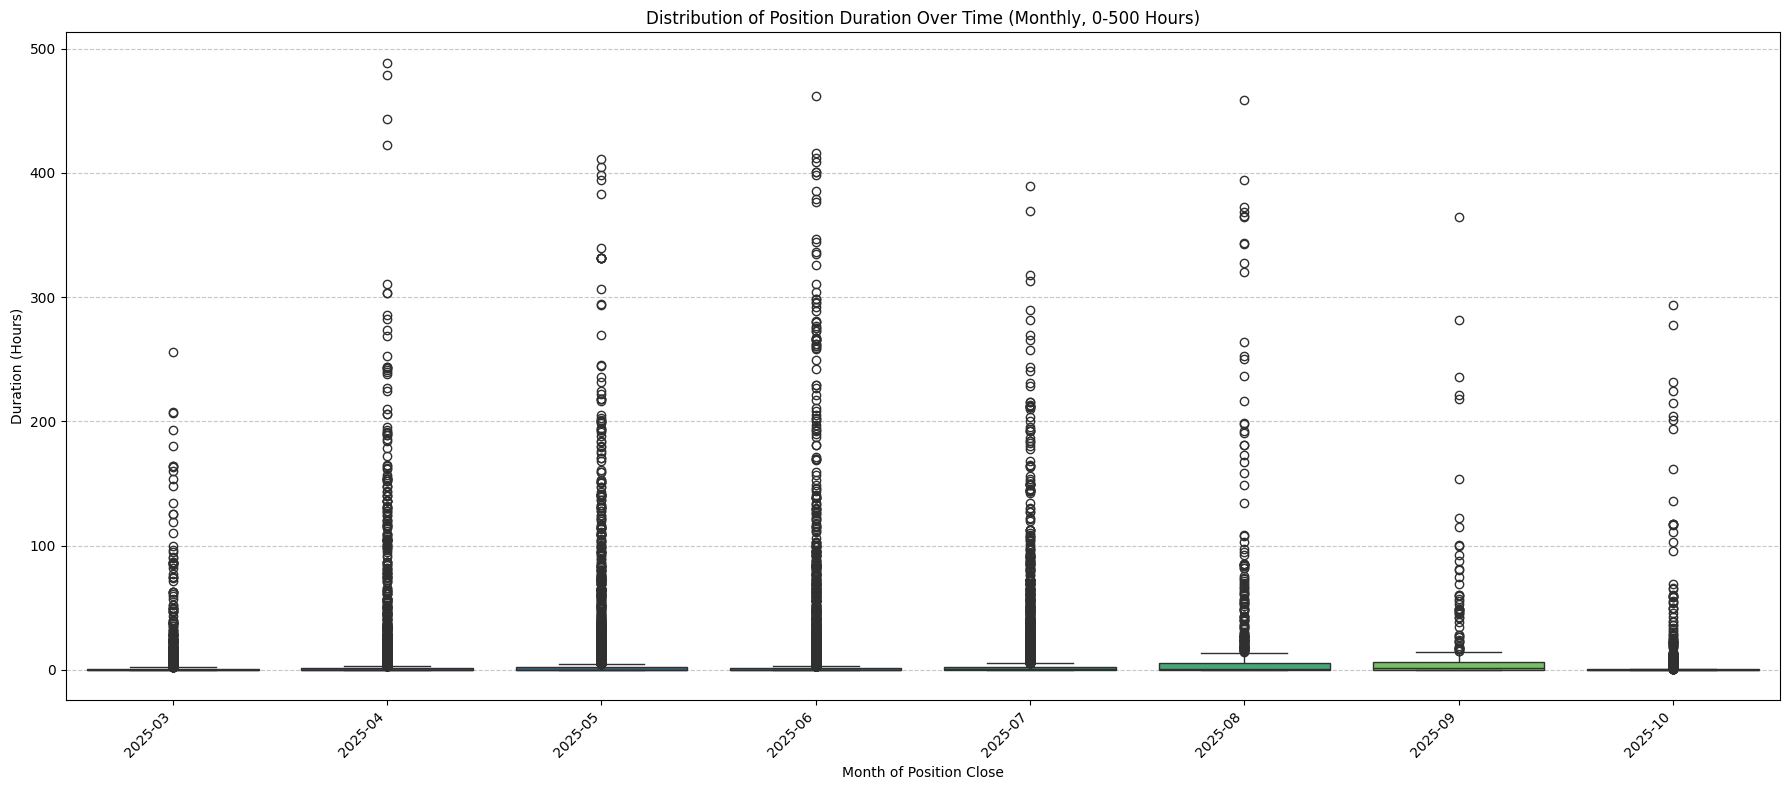

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'ts' column in the 'Trade' DataFrame is datetime objects
if not pd.api.types.is_datetime64_any_dtype(data['Trade']['ts']):
    print("Converting 'ts' column in 'Trade' DataFrame to datetime...")
    data['Trade']['ts'] = pd.to_datetime(data['Trade']['ts'])
    print("Conversion complete.")

# Calculate position durations
# Reset index to make 'account_id' a regular column for easier grouping if needed
# Group by 'position_id' to find open and close times for each unique position
position_summary = data['Trade'].reset_index().groupby('position_id').agg(
    account_id=('account_id', 'first'), # Assuming account_id is consistent for a position_id
    open_time=('ts', 'min'),
    close_time=('ts', 'max'),
    open_close_types=('openclose', lambda x: set(x.unique())) # Get unique openclose types
)

# Filter for positions that have both 'OPEN' and 'CLOSE' states
# This handles cases where a position might only have an 'OPEN' or 'CLOSE' record (e.g., partial data)
position_summary = position_summary[
    position_summary['open_close_types'].apply(lambda x: 'OPEN' in x and 'CLOSE' in x)
].copy()

# Calculate duration in hours
position_summary['duration_hours'] = (position_summary['close_time'] - position_summary['open_time']).dt.total_seconds() / 3600

# Filter for durations between 0 and 500 hours
position_summary_filtered = position_summary[(position_summary['duration_hours'] >= 0) & (position_summary['duration_hours'] <= 500)].copy()

# Extract a time period for trend analysis. Using the month of the close time.
position_summary_filtered['close_month'] = position_summary_filtered['close_time'].dt.to_period('M').astype(str) # Convert to string for plotting

# Sort by close_month for better visualization order
position_summary_filtered = position_summary_filtered.sort_values('close_month')

# Create the box plot
plt.figure(figsize=(18, 8))
sns.boxplot(x='close_month', y='duration_hours', data=position_summary_filtered, palette='viridis', hue='close_month', legend=False)
plt.title('Distribution of Position Duration Over Time (Monthly, 0-500 Hours)')
plt.xlabel('Month of Position Close')
plt.ylabel('Duration (Hours)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

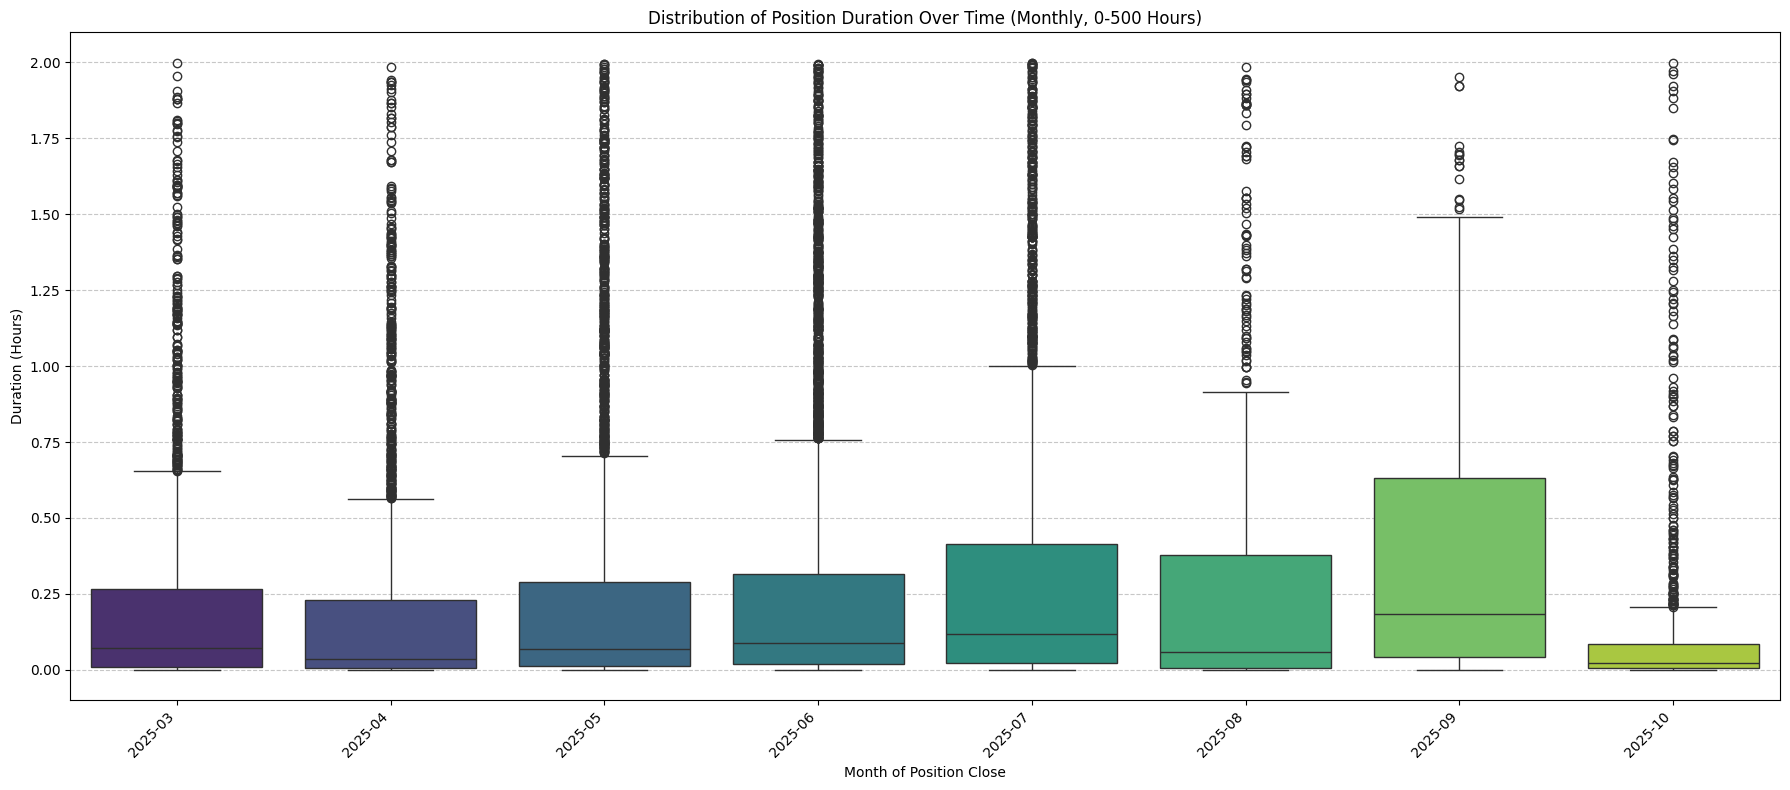

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'ts' column in the 'Trade' DataFrame is datetime objects
# (This step might have already been done in previous cells, but included for completeness)
if not pd.api.types.is_datetime64_any_dtype(data['Trade']['ts']):
    print("Converting 'ts' column in 'Trade' DataFrame to datetime...")
    data['Trade']['ts'] = pd.to_datetime(data['Trade']['ts'])
    print("Conversion complete.")

# Calculate position durations (re-calculating to ensure all steps are in one cell if needed)
position_summary = data['Trade'].reset_index().groupby('position_id').agg(
    account_id=('account_id', 'first'),
    open_time=('ts', 'min'),
    close_time=('ts', 'max'),
    open_close_types=('openclose', lambda x: set(x.unique()))
)
position_summary = position_summary[
    position_summary['open_close_types'].apply(lambda x: 'OPEN' in x and 'CLOSE' in x)
].copy()
position_summary['duration_hours'] = (position_summary['close_time'] - position_summary['open_time']).dt.total_seconds() / 3600

# Filter for durations between 0 and 500 hours
position_summary_filtered = position_summary[(position_summary['duration_hours'] >= 0) & (position_summary['duration_hours'] <= 2)].copy()

# Extract a time period for trend analysis. Using the month of the close time.
position_summary_filtered['close_month'] = position_summary_filtered['close_time'].dt.to_period('M').astype(str)

# Sort by close_month for better visualization order
position_summary_filtered = position_summary_filtered.sort_values('close_month')

# Create the box plot
plt.figure(figsize=(18, 8))
sns.boxplot(x='close_month', y='duration_hours', data=position_summary_filtered, palette='viridis', hue='close_month', legend=False)
plt.title('Distribution of Position Duration Over Time (Monthly, 0-500 Hours)')
plt.xlabel('Month of Position Close')
plt.ylabel('Duration (Hours)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# open close

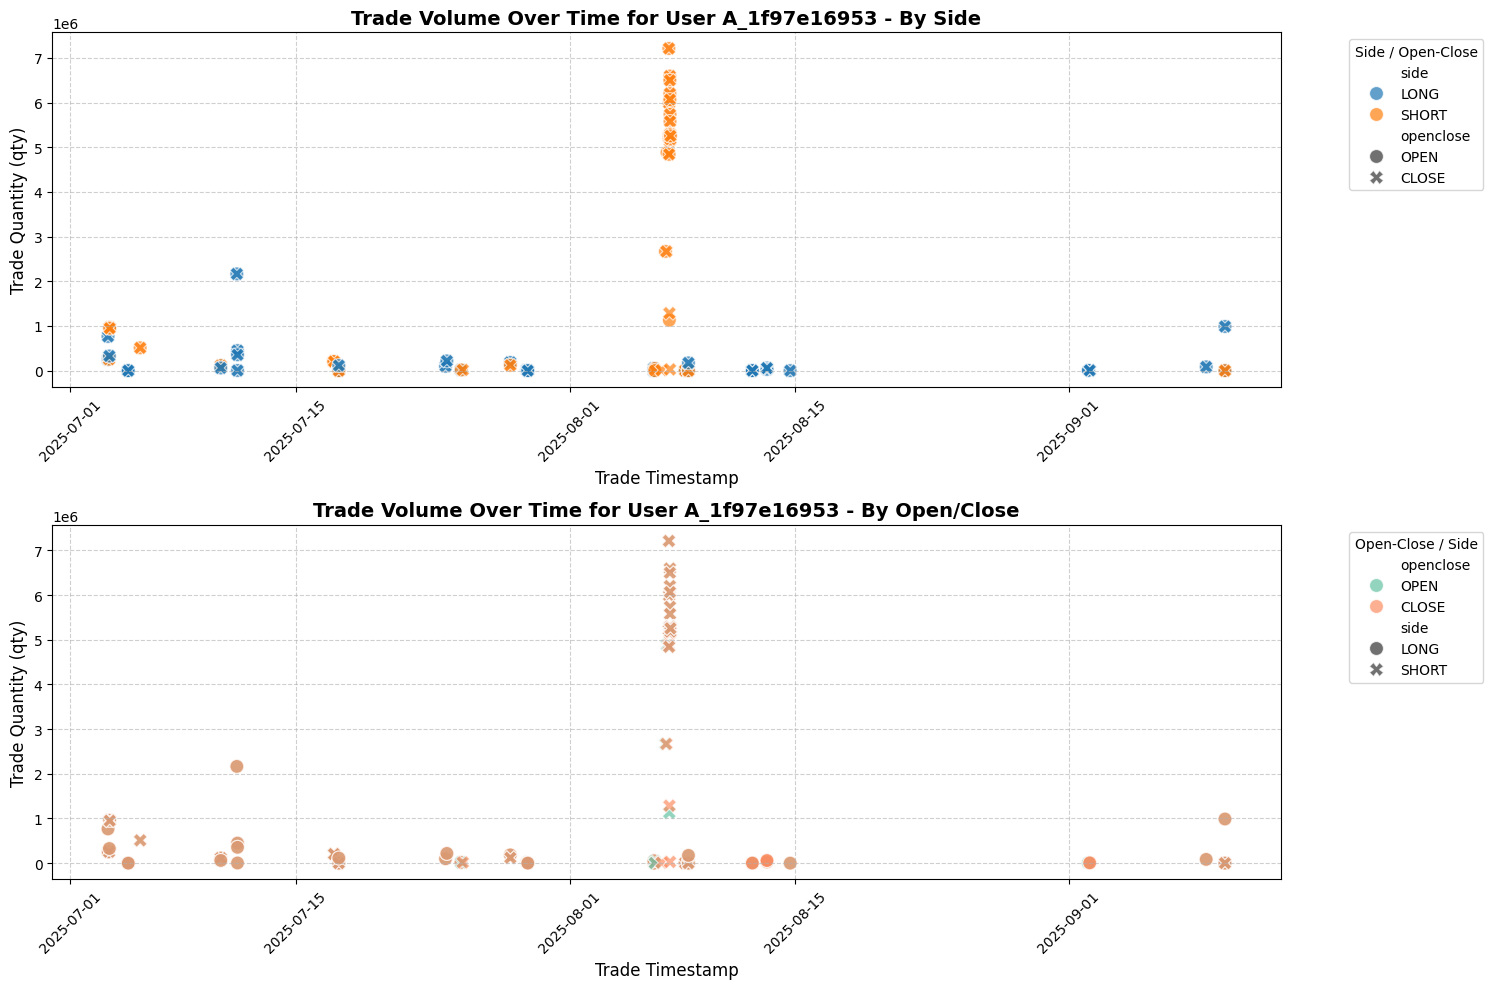


📊 User A_1f97e16953 거래 통계:
총 거래 수: 199

▶ Side 분포:
side
LONG     120
SHORT     79
Name: count, dtype: int64

▶ Open/Close 분포:
openclose
CLOSE    100
OPEN      99
Name: count, dtype: int64

▶ 평균 거래량: 1072041.63009553
▶ 총 거래량: 213336284.38900998


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# User to analyze
user_id = 'A_1f97e16953'

# Check if 'Trade' DataFrame exists and has the necessary columns
if 'Trade' in data and 'ts' in data['Trade'].columns and 'qty' in data['Trade'].columns:
    # Filter the Trade DataFrame for the specific user and make an explicit copy
    user_trades = data['Trade'].loc[user_id].copy()

    # Convert 'ts' to datetime if not already done
    user_trades['ts'] = pd.to_datetime(user_trades['ts'])

    # Sort by timestamp to ensure correct plotting order
    user_trades = user_trades.sort_values(by='ts')

    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

    # Plot 1: LONG vs SHORT 구분 (색상으로)
    sns.scatterplot(
        data=user_trades,
        x='ts',
        y='qty',
        hue='side',  # LONG/SHORT 구분
        style='openclose',  # OPEN/CLOSE 구분 (마커 모양)
        s=100,  # 마커 크기
        alpha=0.7,
        ax=ax1
    )
    ax1.set_title(f'Trade Volume Over Time for User {user_id} - By Side', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Trade Timestamp', fontsize=12)
    ax1.set_ylabel('Trade Quantity (qty)', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.6)
    ax1.tick_params(axis='x', rotation=45)
    ax1.legend(title='Side / Open-Close', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot 2: OPEN vs CLOSE 구분 (색상으로)
    sns.scatterplot(
        data=user_trades,
        x='ts',
        y='qty',
        hue='openclose',  # OPEN/CLOSE 구분
        style='side',  # LONG/SHORT 구분 (마커 모양)
        s=100,
        alpha=0.7,
        ax=ax2,
        palette='Set2'
    )
    ax2.set_title(f'Trade Volume Over Time for User {user_id} - By Open/Close', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Trade Timestamp', fontsize=12)
    ax2.set_ylabel('Trade Quantity (qty)', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.6)
    ax2.tick_params(axis='x', rotation=45)
    ax2.legend(title='Open-Close / Side', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

    # 거래 통계 출력
    print(f"\n📊 User {user_id} 거래 통계:")
    print(f"총 거래 수: {len(user_trades)}")
    print(f"\n▶ Side 분포:")
    print(user_trades['side'].value_counts())
    print(f"\n▶ Open/Close 분포:")
    print(user_trades['openclose'].value_counts())
    print(f"\n▶ 평균 거래량: {user_trades['qty'].mean():.8f}")
    print(f"▶ 총 거래량: {user_trades['qty'].sum():.8f}")

else:
    print("Error: 'Trade' DataFrame not found or missing 'ts'/'qty' columns.")

# 정상 거래

In [12]:
data['Trade']

,ts,symbol,side,openclose,position_id,leverage,price,qty,amount
account_id,,,,,,,,,
A_c668740478,2025-03-01 00:04:14.329767,BTCUSDT.PERP,LONG,OPEN,P_9ecd54214c,50,84303.50000,0.177839,14992.450136
A_c668740478,2025-03-01 00:09:08.199617,BTCUSDT.PERP,LONG,CLOSE,P_9ecd54214c,0,84321.00000,0.177839,14995.562319
A_7e27164ab6,2025-03-01 00:23:25.371503,BTCUSDT.PERP,LONG,OPEN,P_fbe21fd2c4,2,84369.20000,0.002787,235.136960
A_c668740478,2025-03-01 00:30:03.218306,BTCUSDT.PERP,LONG,OPEN,P_9567d3d1d3,50,84243.30000,0.178533,15040.209079
A_c668740478,2025-03-01 00:34:38.392647,BTCUSDT.PERP,LONG,CLOSE,P_9567d3d1d3,0,84121.00000,0.178533,15018.374493
...,...,...,...,...,...,...,...,...,...
A_d444580218,2025-10-31 19:57:56.912556,ASRUSDT.PERP,LONG,CLOSE,P_76caf567c6,0,1.78100,4060.900000,7232.462900
A_f96ede8d34,2025-10-31 19:58:19.592943,VELODROMEUSDT.PERP,LONG,OPEN,P_8ec085ef96,10,0.04235,283353.000000,11999.999550
A_d444580218,2025-10-31 19:58:19.605461,VELODROMEUSDT.PERP,LONG,OPEN,P_549a14c21c,10,0.04235,170011.000000,7199.965850


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_position_duration(trade_df, account_id):
    """
    정상 거래: 포지션 지속 시간이 다양하고 충분히 김
    이상 거래: 거의 모든 포지션이 초단타 (5분 이내)
    """

    account_trades = trade_df[trade_df.index == account_id]

    # OPEN-CLOSE 매칭
    positions = []
    for pos_id in account_trades['position_id'].unique():
        pos_trades = account_trades[account_trades['position_id'] == pos_id]

        open_trade = pos_trades[pos_trades['openclose'] == 'OPEN']
        close_trade = pos_trades[pos_trades['openclose'] == 'CLOSE']

        if len(open_trade) > 0 and len(close_trade) > 0:
            duration = (close_trade['ts'].iloc[0] - open_trade['ts'].iloc[0]).total_seconds() / 60
            positions.append({
                'position_id': pos_id,
                'duration_minutes': duration,
                'open_time': open_trade['ts'].iloc[0],
                'close_time': close_trade['ts'].iloc[0]
            })

    df_positions = pd.DataFrame(positions)

    # 통계 분석
    stats = {
        'avg_duration': df_positions['duration_minutes'].mean(),
        'median_duration': df_positions['duration_minutes'].median(),
        'std_duration': df_positions['duration_minutes'].std(),
        'min_duration': df_positions['duration_minutes'].min(),
        'max_duration': df_positions['duration_minutes'].max(),
        'ultra_fast_ratio': (df_positions['duration_minutes'] < 5).sum() / len(df_positions) * 100
    }

    # 판단 기준
    if stats['ultra_fast_ratio'] > 70:
        classification = "🔴 ABNORMAL - 초단타 거래 집중"
    elif stats['median_duration'] > 60:
        classification = "🟢 NORMAL - 충분한 포지션 유지"
    else:
        classification = "🟡 SUSPICIOUS - 짧은 포지션 위주"

    return stats, classification, df_positions

# 사용 예시
stats, classification, positions = analyze_position_duration(data['Trade'], 'A_c668740478')
print(f"계정 분류: {classification}")
print(f"평균 지속 시간: {stats['avg_duration']:.2f}분")
print(f"초단타 비율: {stats['ultra_fast_ratio']:.2f}%")

계정 분류: 🟡 SUSPICIOUS - 짧은 포지션 위주
평균 지속 시간: 58.47분
초단타 비율: 36.02%


In [15]:
def analyze_time_distribution(trade_df, account_id):
    """
    정상 거래: 거래 시간이 고르게 분포, 사람의 생활 패턴 반영
    이상 거래: 특정 시간(펀딩 시점)에 몰림, 또는 24시간 균등 분포 (봇)
    """
    account_trades = trade_df[trade_df['account_id'] == account_id]

    # 시간별 거래 빈도
    account_trades['hour'] = account_trades['ts'].dt.hour
    hourly_dist = account_trades.groupby('hour').size()

    # 엔트로피 계산 (균등도 측정)
    from scipy.stats import entropy
    probabilities = hourly_dist / hourly_dist.sum()
    time_entropy = entropy(probabilities)

    # 표준편차 계산
    std_hourly = hourly_dist.std()
    mean_hourly = hourly_dist.mean()
    cv = std_hourly / mean_hourly  # 변동계수

    # 펀딩 시점 집중도 (0, 4, 8, 12, 16, 20시)
    funding_hours = [0, 4, 8, 12, 16, 20]
    funding_trades = account_trades[account_trades['hour'].isin(funding_hours)]
    funding_concentration = len(funding_trades) / len(account_trades) * 100

    # 판단
    if funding_concentration > 70:
        classification = "🔴 ABNORMAL - 펀딩 시점 집중"
    elif time_entropy > 2.5:  # 너무 균등 (봇)
        classification = "🔴 ABNORMAL - 봇 의심 (24시간 균등)"
    elif 1.5 < time_entropy < 2.5:
        classification = "🟢 NORMAL - 자연스러운 분포"
    else:
        classification = "🟡 SUSPICIOUS - 불규칙한 패턴"

    return {
        'entropy': time_entropy,
        'funding_concentration': funding_concentration,
        'classification': classification,
        'hourly_distribution': hourly_dist
    }

# 시각화
def plot_time_distribution(account_id, trade_df):
    result = analyze_time_distribution(trade_df, account_id)

    plt.figure(figsize=(12, 4))
    result['hourly_distribution'].plot(kind='bar')
    plt.axvline(x=[0, 4, 8, 12, 16, 20], color='red', linestyle='--', alpha=0.3, label='Funding times')
    plt.title(f"{account_id} - {result['classification']}")
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Trades')
    plt.show()

In [16]:
def check_ip_independence(ip_df, account_id):
    """
    정상 거래: 1 IP = 1 계정
    이상 거래: 1 IP = 여러 계정
    """
    # 해당 계정의 IP 찾기
    account_ip = ip_df[ip_df['account_id'] == account_id]['ip'].values[0]

    # 같은 IP 사용하는 다른 계정들
    same_ip_accounts = ip_df[ip_df['ip'] == account_ip]['account_id'].tolist()

    # IP 타입 판별 (AWS/클라우드 vs 일반)
    def is_cloud_ip(ip):
        first_octet = int(ip.split('.')[0])
        # AWS 대역: 3, 13, 18, 52, 54 등
        aws_ranges = [3, 13, 18, 34, 35, 52, 54, 99]
        return first_octet in aws_ranges

    ip_type = "Cloud/Datacenter" if is_cloud_ip(account_ip) else "Residential"

    # 판단
    if len(same_ip_accounts) == 1:
        classification = "🟢 NORMAL - 독립 계정"
    elif len(same_ip_accounts) >= 5:
        classification = "🔴 ABNORMAL - 다중 계정 클러스터"
    else:
        classification = "🟡 SUSPICIOUS - IP 공유"

    return {
        'account_id': account_id,
        'ip': account_ip,
        'ip_type': ip_type,
        'accounts_on_same_ip': same_ip_accounts,
        'classification': classification
    }

In [17]:
def analyze_trading_diversity(trade_df, account_id):
    """
    정상 거래: 여러 코인, 다양한 레버리지, 다양한 포지션 크기
    이상 거래: 한두 개 코인만, 항상 같은 패턴
    """
    account_trades = trade_df[trade_df['account_id'] == account_id]

    # 거래한 심볼 수
    unique_symbols = account_trades['symbol'].nunique()

    # 레버리지 다양성
    leverage_std = account_trades['leverage'].std()
    unique_leverages = account_trades['leverage'].nunique()

    # 포지션 크기 다양성
    amount_cv = account_trades['amount'].std() / account_trades['amount'].mean()

    # LONG vs SHORT 비율
    side_ratio = (account_trades['side'] == 'LONG').sum() / len(account_trades)

    # 판단
    diversity_score = 0

    if unique_symbols >= 5:
        diversity_score += 30
    elif unique_symbols >= 3:
        diversity_score += 15

    if unique_leverages >= 3:
        diversity_score += 20

    if 0.3 < side_ratio < 0.7:  # LONG-SHORT 균형
        diversity_score += 25

    if amount_cv > 0.5:  # 포지션 크기 다양
        diversity_score += 25

    if diversity_score >= 70:
        classification = "🟢 NORMAL - 다양한 거래 패턴"
    elif diversity_score >= 40:
        classification = "🟡 MODERATE - 보통 다양성"
    else:
        classification = "🔴 ABNORMAL - 단조로운 패턴"

    return {
        'diversity_score': diversity_score,
        'unique_symbols': unique_symbols,
        'unique_leverages': unique_leverages,
        'long_ratio': side_ratio * 100,
        'amount_cv': amount_cv,
        'classification': classification
    }

In [18]:
def check_timing_independence(trade_df, account_id, all_accounts):
    """
    정상 거래: 다른 계정과 거래 타이밍이 무관
    이상 거래: 특정 계정들과 항상 동시에 거래
    """
    account_trades = trade_df[trade_df['account_id'] == account_id]

    # 각 거래 시간에 대해 다른 계정들의 동시 거래 확인
    time_window = pd.Timedelta(seconds=10)

    correlations = []
    for other_account in all_accounts:
        if other_account == account_id:
            continue

        other_trades = trade_df[trade_df['account_id'] == other_account]

        # 시간 겹침 계산
        overlap_count = 0
        for ts in account_trades['ts']:
            nearby_trades = other_trades[
                (other_trades['ts'] >= ts - time_window) &
                (other_trades['ts'] <= ts + time_window)
            ]
            if len(nearby_trades) > 0:
                overlap_count += 1

        overlap_ratio = overlap_count / len(account_trades) if len(account_trades) > 0 else 0

        if overlap_ratio > 0.1:  # 10% 이상 겹침
            correlations.append({
                'other_account': other_account,
                'overlap_ratio': overlap_ratio * 100
            })

    # 판단
    if len(correlations) == 0:
        classification = "🟢 NORMAL - 독립적 거래 타이밍"
    elif len(correlations) >= 3 or any(c['overlap_ratio'] > 50 for c in correlations):
        classification = "🔴 ABNORMAL - 조직적 동시 거래"
    else:
        classification = "🟡 SUSPICIOUS - 일부 타이밍 겹침"

    return {
        'classification': classification,
        'correlated_accounts': correlations
    }

In [19]:
def analyze_profit_seeking_behavior(trade_df, account_id):
    """
    정상 거래: 실제로 수익을 내려고 함 (손익비가 다양, 때로 큰 손실/수익)
    이상 거래: 수익이 거의 0에 가까움 (거래량만 목적)
    """
    account_trades = trade_df[trade_df['account_id'] == account_id]

    # 각 포지션의 손익 계산
    position_pnl = []
    for pos_id in account_trades['position_id'].unique():
        pos_trades = account_trades[account_trades['position_id'] == pos_id]

        open_trade = pos_trades[pos_trades['openclose'] == 'OPEN']
        close_trade = pos_trades[pos_trades['openclose'] == 'CLOSE']

        if len(open_trade) > 0 and len(close_trade) > 0:
            entry_price = open_trade['price'].iloc[0]
            exit_price = close_trade['price'].iloc[0]
            qty = open_trade['qty'].iloc[0]
            leverage = open_trade['leverage'].iloc[0]
            side = open_trade['side'].iloc[0]

            # 손익 계산
            if side == 'LONG':
                pnl_pct = (exit_price - entry_price) / entry_price * 100 * leverage
            else:  # SHORT
                pnl_pct = (entry_price - exit_price) / entry_price * 100 * leverage

            position_pnl.append(pnl_pct)

    if len(position_pnl) == 0:
        return {'classification': "⚪ NO DATA"}

    pnl_array = np.array(position_pnl)

    # 통계
    avg_pnl = pnl_array.mean()
    std_pnl = pnl_array.std()
    max_win = pnl_array.max()
    max_loss = pnl_array.min()

    # 수익률이 거의 0에 가까운 거래 비율
    near_zero_ratio = (np.abs(pnl_array) < 0.5).sum() / len(pnl_array) * 100

    # 판단
    if near_zero_ratio > 80:
        classification = "🔴 ABNORMAL - 거래량 목적 (수익 거의 0)"
    elif std_pnl > 5:  # 손익 변동성 큼 = 실제 거래
        classification = "🟢 NORMAL - 실제 수익 추구"
    else:
        classification = "🟡 SUSPICIOUS - 낮은 수익률 패턴"

    return {
        'classification': classification,
        'avg_pnl_pct': avg_pnl,
        'std_pnl': std_pnl,
        'max_win_pct': max_win,
        'max_loss_pct': max_loss,
        'near_zero_ratio': near_zero_ratio
    }

In [24]:
def comprehensive_normality_check(account_id, trade_df, ip_df, all_accounts):
    """
    모든 특징을 종합하여 정상성 점수 계산
    """
    results = {}
    score = 100  # 시작 점수 100점

    # 1. 포지션 지속 시간
    duration_stats, duration_class, _ = analyze_position_duration(trade_df, account_id)
    results['duration'] = duration_class
    if "ABNORMAL" in duration_class:
        score -= 30
    elif "SUSPICIOUS" in duration_class:
        score -= 15

    # 2. 시간 분포
    time_analysis = analyze_time_distribution(trade_df, account_id)
    results['time_distribution'] = time_analysis['classification']
    if "ABNORMAL" in time_analysis['classification']:
        score -= 25

    # 3. IP 독립성
    ip_check = check_ip_independence(ip_df, account_id)
    results['ip'] = ip_check['classification']
    if "ABNORMAL" in ip_check['classification']:
        score -= 30
    elif "SUSPICIOUS" in ip_check['classification']:
        score -= 15

    # 4. 거래 다양성
    diversity = analyze_trading_diversity(trade_df, account_id)
    results['diversity'] = diversity['classification']
    if "ABNORMAL" in diversity['classification']:
        score -= 20

    # 5. 타이밍 독립성
    timing = check_timing_independence(trade_df, account_id, all_accounts)
    results['timing'] = timing['classification']
    if "ABNORMAL" in timing['classification']:
        score -= 25

    # 6. 수익 추구 행동
    profit_behavior = analyze_profit_seeking_behavior(trade_df, account_id)
    results['profit_behavior'] = profit_behavior['classification']
    if "ABNORMAL" in profit_behavior['classification']:
        score -= 20

    # 최종 판단
    if score >= 80:
        final_classification = "🟢 NORMAL TRADER"
    elif score >= 50:
        final_classification = "🟡 SUSPICIOUS"
    else:
        final_classification = "🔴 ABNORMAL - Wash Trading 의심"

    return {
        'account_id': account_id,
        'normality_score': score,
        'final_classification': final_classification,
        'detailed_results': results
    }

# 사용 예시
all_accounts = data['Trade'].index.get_level_values('account_id').unique().tolist()
result = comprehensive_normality_check('A_c668740478', data['Trade'], data['IP'], all_accounts)
print(f"계정: {result['account_id']}")
print(f"정상성 점수: {result['normality_score']}/100")
print(f"최종 판단: {result['final_classification']}")

KeyError: 'account_id'

In [23]:
data.keys()


dict_keys(['Reward', 'Funding', 'Trade', 'IP', 'Spec'])

# 새 섹션

# Wash Trading (가장거래)